# Laboratorio 8

Jhonatan Jurado Rodríguez


1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [52]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers


## Dataset make a moon

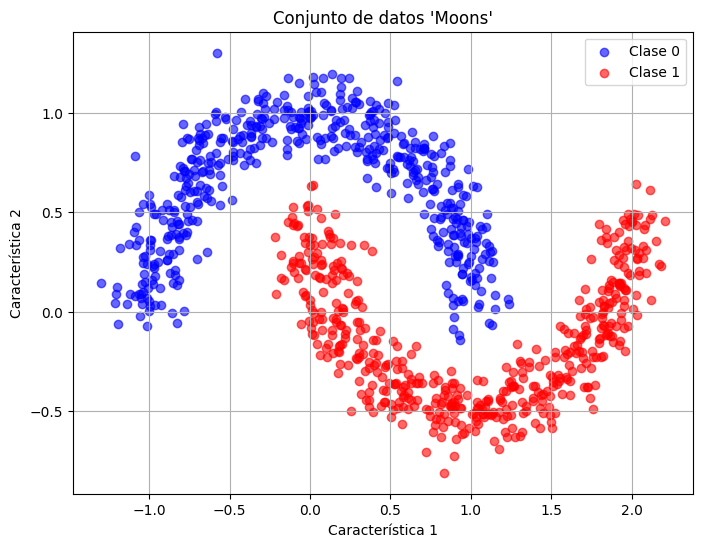

In [53]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)

# Graficar los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Clase 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Clase 1', alpha=0.6)
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Conjunto de datos 'Moons'")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de la red neuronal con Keras
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(2,)),  # Capa oculta con 10 neuronas y ReLU
    layers.Dense(10, activation='relu'),  # Otra capa oculta con 10 neuronas y ReLU
    layers.Dense(1, activation='sigmoid')  # Capa de salida con sigmoide para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

test_acc


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5089 - loss: 0.7265 - val_accuracy: 0.7950 - val_loss: 0.6647
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8145 - loss: 0.6505 - val_accuracy: 0.8750 - val_loss: 0.5989
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8370 - loss: 0.5863 - val_accuracy: 0.8700 - val_loss: 0.5184
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8478 - loss: 0.5012 - val_accuracy: 0.8600 - val_loss: 0.4274
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8673 - loss: 0.4148 - val_accuracy: 0.8650 - val_loss: 0.3550
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8709 - loss: 0.3438 - val_accuracy: 0.8750 - val_loss: 0.3106
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8536 - loss: 0.3281 - val_accuracy: 0.8850 - val_loss: 0.2840
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.2832 - val_accuracy: 0.8850 - val_loss:

0.9800000190734863

In [55]:
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss)


Test accuracy: 0.9800000190734863 
Test loss: 0.05141773819923401


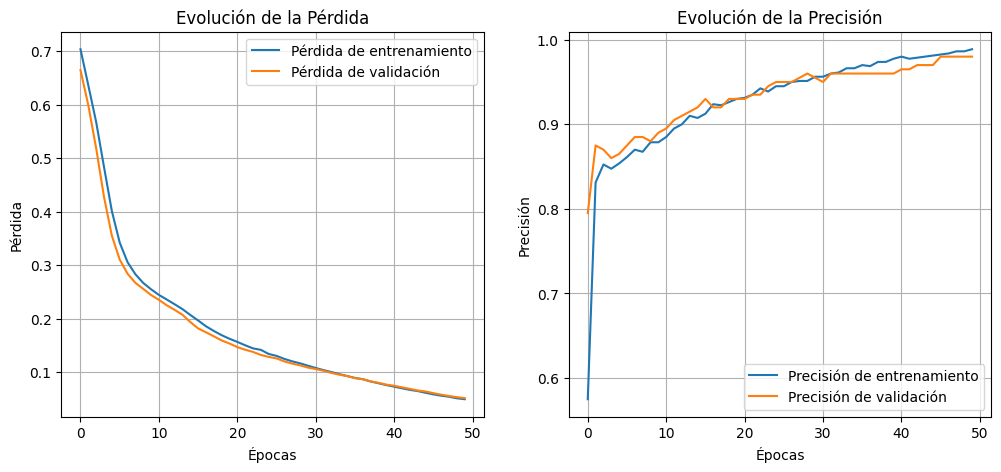

In [56]:
# Graficar la pérdida y la precisión
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica de la pérdida
axs[0].plot(history.history['loss'], label='Pérdida de entrenamiento')
axs[0].plot(history.history['val_loss'], label='Pérdida de validación')
axs[0].set_title('Evolución de la Pérdida')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Pérdida')
axs[0].legend()
axs[0].grid()

# Gráfica de la precisión
axs[1].plot(history.history['accuracy'], label='Precisión de entrenamiento')
axs[1].plot(history.history['val_accuracy'], label='Precisión de validación')
axs[1].set_title('Evolución de la Precisión')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Precisión')
axs[1].legend()
axs[1].grid()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


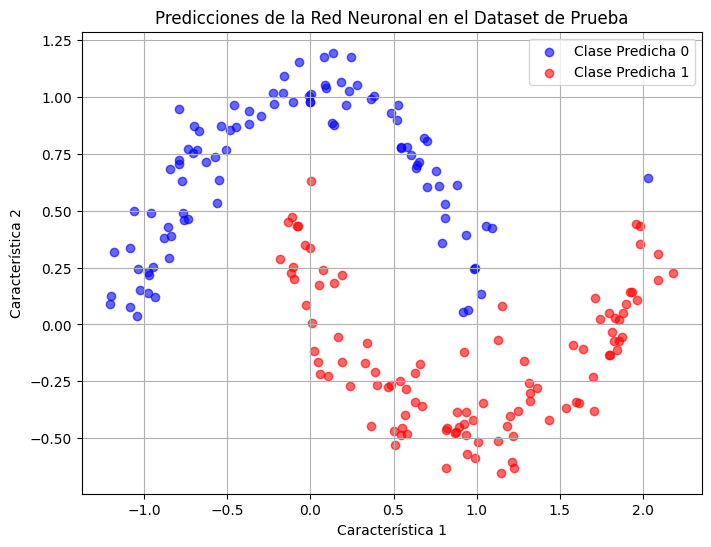

In [57]:
# Generar predicciones
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Graficar los datos de prueba con sus predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_pred_classes == 0, 0], X_test[y_pred_classes == 0, 1], color='blue', label='Clase Predicha 0', alpha=0.6)
plt.scatter(X_test[y_pred_classes == 1, 0], X_test[y_pred_classes == 1, 1], color='red', label='Clase Predicha 1', alpha=0.6)
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Predicciones de la Red Neuronal en el Dataset de Prueba")
plt.legend()
plt.grid(True)
plt.show()

## Dataset load digits

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3205 - loss: 2.0268 - val_accuracy: 0.8222 - val_loss: 0.8731
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8436 - loss: 0.7137 - val_accuracy: 0.9250 - val_loss: 0.3123
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9402 - loss: 0.2769 - val_accuracy: 0.9528 - val_loss: 0.1847
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1695 - val_accuracy: 0.9667 - val_loss: 0.1427
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9872 - loss: 0.1019 - val_accuracy: 0.9722 - val_loss: 0.1227
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9842 - loss: 0.0856 - val_accuracy: 0.9694 - val_loss: 0.1113
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0489 - val_accuracy: 0.9778 - val_loss: 0.1013
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0410 - val_accuracy: 0.9778 - val_loss: 0.1006
Epo

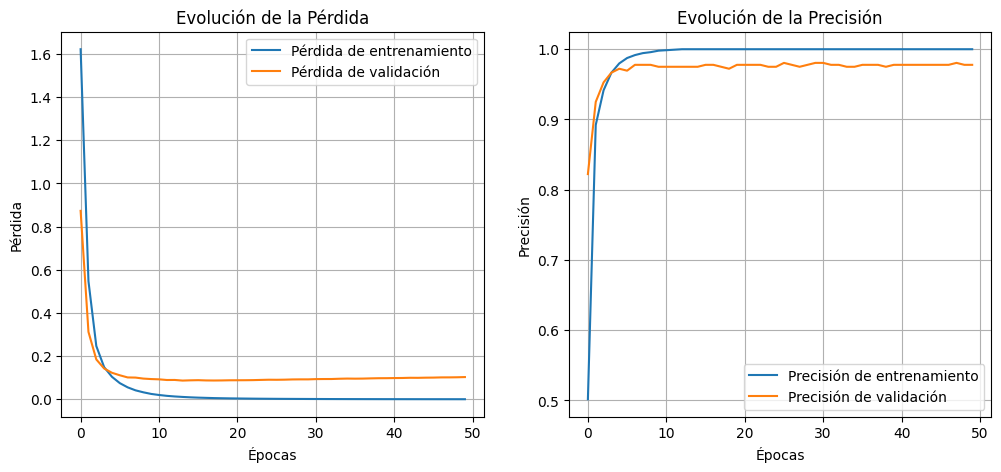

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


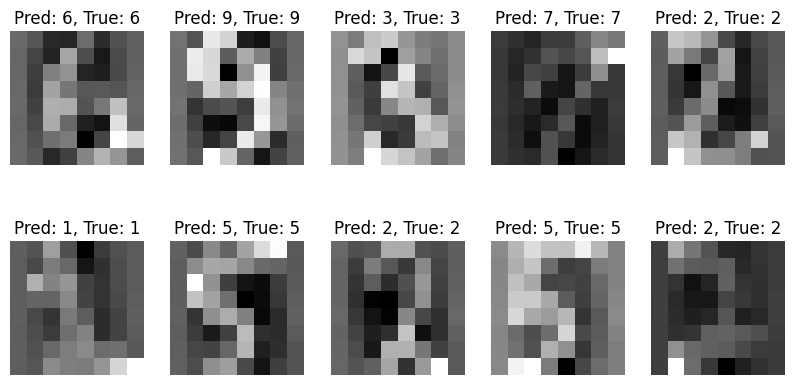

In [58]:
# Cargar el dataset de dígitos
digits = load_digits()
X, y = digits.data, digits.target  # X = imágenes aplanadas, y = etiquetas (0-9)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir las etiquetas en one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

# Definir el modelo de la red neuronal
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(64,)),  # Capa oculta con 64 neuronas
    layers.Dense(32, activation='relu'),  # Segunda capa oculta con 32 neuronas
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (para clasificar 10 dígitos)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en los datos de prueba: {test_acc:.4f}')

# Graficar la pérdida y la precisión
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica de la pérdida
axs[0].plot(history.history['loss'], label='Pérdida de entrenamiento')
axs[0].plot(history.history['val_loss'], label='Pérdida de validación')
axs[0].set_title('Evolución de la Pérdida')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Pérdida')
axs[0].legend()
axs[0].grid()

# Gráfica de la precisión
axs[1].plot(history.history['accuracy'], label='Precisión de entrenamiento')
axs[1].plot(history.history['val_accuracy'], label='Precisión de validación')
axs[1].set_title('Evolución de la Precisión')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Precisión')
axs[1].legend()
axs[1].grid()

plt.show()

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir probabilidades en etiquetas
y_true = np.argmax(y_test, axis=1)  # Convertir one-hot encoding en etiquetas originales

# Mostrar algunas predicciones
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Pred: {y_pred_classes[i]}, True: {y_true[i]}')
    ax.axis('off')

plt.show()


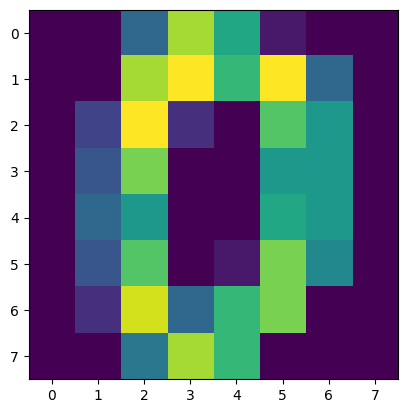

In [59]:
plt.imshow(X[0].reshape(8, 8))

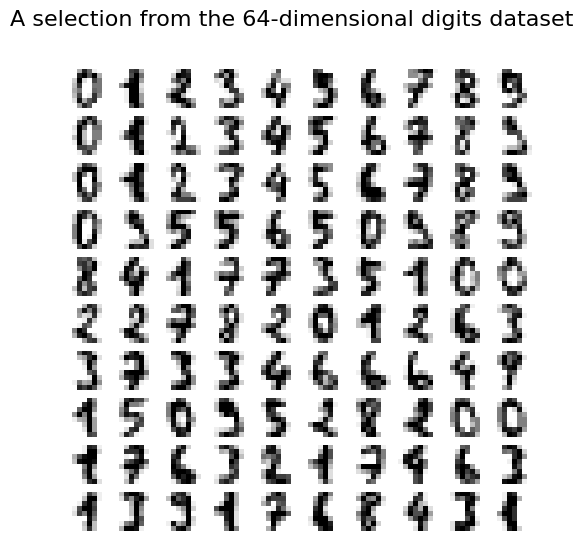

In [60]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)